# Get Images for Each Character

In [1]:
## Found at https://stackoverflow.com/questions/8032642/how-to-obtain-image-size-using-standard-python-class-without-using-external-lib

import struct
import imghdr

def get_image_size(fname):
    '''Determine the image type of fhandle and return its size.
    from draco'''
    with open(fname, 'rb') as fhandle:
        head = fhandle.read(24)
        if len(head) != 24:
            return
        if imghdr.what(fname) == 'png':
            check = struct.unpack('>i', head[4:8])[0]
            if check != 0x0d0a1a0a:
                return
            width, height = struct.unpack('>ii', head[16:24])
        elif imghdr.what(fname) == 'gif':
            width, height = struct.unpack('<HH', head[6:10])
        elif imghdr.what(fname) == 'jpeg':
            try:
                fhandle.seek(0) # Read 0xff next
                size = 2
                ftype = 0
                while not 0xc0 <= ftype <= 0xcf:
                    fhandle.seek(size, 1)
                    byte = fhandle.read(1)
                    while ord(byte) == 0xff:
                        byte = fhandle.read(1)
                    ftype = ord(byte)
                    size = struct.unpack('>H', fhandle.read(2))[0] - 2
                # We are at a SOFn block
                fhandle.seek(1, 1)  # Skip `precision' byte.
                height, width = struct.unpack('>HH', fhandle.read(4))
            except Exception: #IGNORE:W0703
                return
        else:
            return
        return width, height

In [2]:
import os
image_sizes = []

character_image_files = os.listdir('/home/jordan/saltybetdata/scraping_scripts/character_images/')

for character_image_file in character_image_files:
    image_sizes.append((character_image_file.split('.gif')[0], get_image_size('/home/jordan/saltybetdata/scraping_scripts/character_images/' + character_image_file)))

In [3]:
import numpy as np
import seaborn as sns
sns.set()

image_matrix = np.array([[int(x[0]), x[1][0], x[1][1]] for x in image_sizes if x[1] != None])

In [4]:
import pandas as pd

character_image_df = pd.DataFrame(image_matrix, columns=['CharacterId', 'Width', 'Height'], dtype=int)
character_image_df = character_image_df.set_index('CharacterId')

chararacter_image_df = character_image_df[(~character_image_df['Width'].isnull())&(~character_image_df['Height'].isnull())]

# Getting Character Information and Joining

In [5]:
character_info = []

with open('/home/jordan/saltybetdata/scraping_scripts/character_information.txt') as input_file:
    for line in input_file:
        if '|||\n' in line:
            pass
        elif 'by\n' in line:
            character_info.append([int(line.split('|||')[0]), line.split('|||')[1].split(' by\n')[0], ''])
        else:
            character_info.append([int(line.split('|||')[0]), line.split('|||')[1].split(' by ')[0], ' by '.join(line.split(' by ')[1:]).replace('\n', '')])

In [6]:
character_info_df = pd.DataFrame(character_info, columns=['CharacterId', 'Name', 'Author'])
character_info_df = character_info_df.set_index('CharacterId')

In [7]:
# Join these two together

joined_dataset = character_info_df.join(character_image_df, on='CharacterId', rsuffix='_image')
joined_dataset.head()

,Name,Author,Width,Height
CharacterId,,,,
1,Mr. bison,"Vk, updated by terry kuo, adapted by tenebrous",122.0,99.0
2,Bullseye,Doom & o ilusionista,86.0,113.0
3,Elecman,O ilusionista & akitosama,94.0,80.0
4,Ooze-o,O ilusionista,93.0,125.0
5,Shin kazuma,O ilusionista,66.0,94.0


In [8]:
len(joined_dataset)

9664

In [9]:
# 153 characters missing information
print(len(joined_dataset[joined_dataset['Height'].isnull()]))
joined_dataset = joined_dataset[~joined_dataset['Width'].isnull()]


153


In [10]:
joined_dataset[joined_dataset['Width'].isnull()]

,Name,Author,Width,Height
CharacterId,,,,


# Get Match Data

In [11]:
match_results = []

for match_file in os.listdir('/home/jordan/saltybetdata/scraping_scripts/match_results/'):
    with open('/home/jordan/saltybetdata/scraping_scripts/match_results/' + match_file) as input_file:
        match_result = input_file.read().split('\n')[0:2]
        if len(match_result) == 2:
            try:
                first_competitor = match_result[0].split(' vs ')[0]
                second_competitor = match_result[0].split(' vs ')[1].split(' at ')[0]
                winner = match_result[1][8:]
                if first_competitor == winner:
                    winner_id = 'Red'
                elif second_competitor == winner:
                    winner_id = 'Blue'
                else:
                    winner_id = 'N/A'
                    
                match_id = match_file.split('_')[2].split('.t')[0]
                match_results.append([int(match_id), first_competitor, second_competitor, winner_id])
            except Exception as e:
                print(e)
                print(match_result)

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of range
['vs at', 'Winner: N/A']
list index out of ra

In [12]:
match_df = pd.DataFrame(match_results, columns=['MatchId', 'Red', 'Blue', 'WinnerId'])

In [13]:
# Total number of matches
len(match_df) 

946172

In [14]:
# Remove exhibition teams
match_df = match_df[~(match_df['Red'].str.contains('Team')|match_df['Blue'].str.contains('Team'))]

In [15]:
len(match_df)

861280

In [16]:
# Remove ties
match_df = match_df[match_df['WinnerId'] != 'N/A']

In [17]:
len(match_df)

856230

In [18]:
# Remove self fights
print(len(match_df[match_df['Blue'] == match_df['Red']]))
match_df = match_df[match_df['Blue'] != match_df['Red']]

76


In [19]:
# Total number of matches which align with a known character
match_df = match_df[(match_df['Red'].isin(joined_dataset['Name']))&(match_df['Blue'].isin(joined_dataset['Name']))]
len(match_df)

810422

In [20]:
match_df = match_df[match_df['Blue'].isin(joined_dataset['Name'])&(match_df['Red'].isin(joined_dataset['Name']))]

In [21]:
match_df['RedWidth'] = None
match_df['RedHeight'] = None
match_df['RedId'] = None
match_df['BlueWidth'] = None
match_df['BlueHeight'] = None
match_df['BlueId'] = None

In [22]:
joined_dataset.to_csv('/home/jordan/character_information.csv')

In [23]:
match_df.to_csv('/home/jordan/match_data.csv')

In [24]:
match_df[['MatchId', 'Red', 'Blue', 'WinnerId']].to_csv('/home/jordan/match_data.csv')

In [25]:
temp_dict = match_df.to_dict('index')

In [26]:
character_dict = joined_dataset.reset_index().set_index('Name').to_dict('index')

In [27]:
for item in temp_dict:
    try:
        temp_dict[item]['RedId'] = character_dict[temp_dict[item]['Red']]['CharacterId']
        temp_dict[item]['RedWidth'] = character_dict[temp_dict[item]['Red']]['Width']
        temp_dict[item]['RedHeight'] = character_dict[temp_dict[item]['Red']]['Height']
        temp_dict[item]['BlueId'] = character_dict[temp_dict[item]['Blue']]['CharacterId']
        temp_dict[item]['BlueWidth'] = character_dict[temp_dict[item]['Blue']]['Width']
        temp_dict[item]['BlueHeight'] = character_dict[temp_dict[item]['Blue']]['Height']
        if item % 10000 == 0:
            print(item)
    except:
        print(temp_dict[item]['Red'], temp_dict[item]['Blue'])

0
10000
20000
30000
40000
60000
70000
80000
90000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
220000
230000
240000
250000
260000
270000
280000
290000
300000
320000
330000
340000
350000
360000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
710000
720000
740000
750000
760000
770000
780000
790000
800000
810000
820000
840000
850000
860000
870000
880000
890000
910000
920000
930000
940000


In [28]:
pd.DataFrame(temp_dict).transpose().to_csv('/home/jordan/joined_match_data.csv')

# Constructing Win Matrices

In [29]:
complete_match_data = pd.DataFrame(temp_dict).transpose()

In [30]:
len(complete_match_data)

810422

In [31]:
len(list(set(complete_match_data['Blue'].values).union(set(complete_match_data['Red']))))

9494

In [32]:
# Average number of matches per character
x = complete_match_data['Blue'].value_counts() + complete_match_data['Red'].value_counts()
x.mean()
x.median()

156.0

In [ ]:
# Check if strongly connected

In [33]:
# Creating Test and Train Datasets

## Train Dataset

msk = np.random.rand(len(complete_match_data)) < 0.9

#test_match_data = complete_match_data[~msk]
#complete_match_data = complete_match_data[msk]

In [35]:
complete_match_data = pd.read_csv('/home/jordan/training_match_data.csv')
test_match_data = pd.read_csv('/home/jordan/test_match_data.csv')

In [36]:
natural_indexed_dict = joined_dataset.reset_index().reset_index().set_index('Name').to_dict('index')
natural_indexed_dict

{'Mr. bison': {'index': 0,
  'CharacterId': 1,
  'Author': 'Vk, updated by terry kuo, adapted by tenebrous',
  'Width': 122.0,
  'Height': 99.0},
 'Bullseye': {'index': 1,
  'CharacterId': 2,
  'Author': 'Doom & o ilusionista',
  'Width': 86.0,
  'Height': 113.0},
 'Elecman': {'index': 2,
  'CharacterId': 3,
  'Author': 'O ilusionista & akitosama',
  'Width': 94.0,
  'Height': 80.0},
 'Ooze-o': {'index': 3,
  'CharacterId': 4,
  'Author': 'O ilusionista',
  'Width': 93.0,
  'Height': 125.0},
 'Shin kazuma': {'index': 4,
  'CharacterId': 5,
  'Author': 'O ilusionista',
  'Width': 66.0,
  'Height': 94.0},
 'Mexican typhoon': {'index': 5,
  'CharacterId': 6,
  'Author': 'O ilusionista',
  'Width': 124.0,
  'Height': 131.0},
 'Zangief maskered': {'index': 6,
  'CharacterId': 7,
  'Author': 'O ilusionista',
  'Width': 138.0,
  'Height': 115.0},
 'Predalien': {'index': 7,
  'CharacterId': 8,
  'Author': 'Josipknezovicz',
  'Width': 237.0,
  'Height': 130.0},
 'Eva-00': {'index': 8,
  'Charac

In [37]:
win_matrix = np.zeros((len(joined_dataset), len(joined_dataset)))
for match in complete_match_data.iterrows():
    if match[0] % 10000 == 0:
        print(match[0])
    winner_index = natural_indexed_dict[match[1][match[1]['WinnerId']]]['index']
    if match[1]['WinnerId'] == 'Red':
        loser_index = natural_indexed_dict[match[1]['Blue']]['index']
    else:
        loser_index = natural_indexed_dict[match[1]['Red']]['index']
    win_matrix[winner_index, loser_index] = win_matrix[winner_index, loser_index] + 1

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000


In [38]:
adjacency_dict = {}
for row_index in range(len(win_matrix)):
    adjacency_dict[row_index] = []
    if row_index % 1000 == 0:
        print(row_index)
    for col_index in range(len(win_matrix)):
        if win_matrix[row_index, col_index] > 0:
            adjacency_dict[row_index].append(col_index)
    
print(adjacency_dict)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [39]:
from tarjan import tarjan
tarjan_output = tarjan(adjacency_dict)
removal_list = []
for item in tarjan_output:
    if len(item) == 1:
        removal_list.append(item[0])

In [40]:
removal_list

[70,
 286,
 3379,
 4607,
 302,
 5083,
 1507,
 2898,
 4486,
 4857,
 3224,
 3066,
 3004,
 4907,
 5942,
 3380,
 4694,
 5699,
 2594,
 8851,
 8181,
 8774,
 7645,
 3899,
 5075,
 5843,
 8853,
 9182,
 7935,
 9077,
 9157,
 7941,
 8587,
 9476,
 163,
 781,
 1271,
 1565,
 2022,
 2234,
 2641,
 2921,
 3086,
 6665,
 6762,
 7188,
 7612,
 7776,
 8121,
 8150,
 8801,
 8772,
 8830,
 9031,
 9223,
 9321,
 9348,
 9390]

In [41]:
#natural_indexed_dict = joined_dataset.reset_index().reset_index().set_index('Name').to_dict('index')
removal_joined_dataset = joined_dataset.reset_index()[~joined_dataset.reset_index().index.isin(removal_list)]
natural_indexed_dict = removal_joined_dataset.reset_index().reset_index().set_index('Name').to_dict('index')

In [42]:
# Construct win matrix with removals
win_matrix = np.zeros((len(removal_joined_dataset), len(removal_joined_dataset)))
for match in complete_match_data.iterrows():
    try:
        if match[0] % 10000 == 0:
            print(match[0])
        winner_index = natural_indexed_dict[match[1][match[1]['WinnerId']]]['index']
        if match[1]['WinnerId'] == 'Red':
            loser_index = natural_indexed_dict[match[1]['Blue']]['index']
        else:
            loser_index = natural_indexed_dict[match[1]['Red']]['index']
        win_matrix[winner_index, loser_index] = win_matrix[winner_index, loser_index] + 1
    except Exception as e:
        print(str(e))

0
index 9489 is out of bounds for axis 0 with size 9453
index 9464 is out of bounds for axis 0 with size 9453
index 9501 is out of bounds for axis 1 with size 9453
'Burai_yamamoto'
index 9486 is out of bounds for axis 0 with size 9453
'Akito(coh)'
index 9487 is out of bounds for axis 1 with size 9453
'Muhammad ali'
index 9502 is out of bounds for axis 0 with size 9453
index 9485 is out of bounds for axis 0 with size 9453
'Mettaton neo'
index 9461 is out of bounds for axis 1 with size 9453
'Cailloustrawberry the soul ninja'
index 9493 is out of bounds for axis 0 with size 9453
index 9487 is out of bounds for axis 0 with size 9453
index 9475 is out of bounds for axis 1 with size 9453
'Akito(coh)'
index 9470 is out of bounds for axis 0 with size 9453
'Burai_yamamoto'
'Nouka EX3'
'Patrick'
index 9456 is out of bounds for axis 1 with size 9453
'Micky ls'
index 9487 is out of bounds for axis 1 with size 9453
index 9456 is out of bounds for axis 0 with size 9453
index 9482 is out of bounds fo

index 9485 is out of bounds for axis 0 with size 9453
80000
index 9484 is out of bounds for axis 0 with size 9453
'Sayuri hexe'
'Cammy snk'
index 9456 is out of bounds for axis 1 with size 9453
index 9505 is out of bounds for axis 1 with size 9453
'Mr.megane'
index 9487 is out of bounds for axis 1 with size 9453
'Catwalk'
index 9473 is out of bounds for axis 1 with size 9453
'Zelda-cdi'
index 9509 is out of bounds for axis 0 with size 9453
index 9506 is out of bounds for axis 1 with size 9453
'Calliel lezai'
'Lanky kong'
index 9489 is out of bounds for axis 1 with size 9453
index 9480 is out of bounds for axis 1 with size 9453
index 9498 is out of bounds for axis 1 with size 9453
index 9460 is out of bounds for axis 0 with size 9453
index 9477 is out of bounds for axis 1 with size 9453
index 9490 is out of bounds for axis 1 with size 9453
index 9494 is out of bounds for axis 1 with size 9453
'Agrias BC'
'Burai_yamamoto'
index 9469 is out of bounds for axis 1 with size 9453
'F.o.e.'
'Sf

'Cammy snk'
index 9493 is out of bounds for axis 0 with size 9453
'Decade as kuuga'
'Cammy snk'
index 9456 is out of bounds for axis 0 with size 9453
index 9465 is out of bounds for axis 0 with size 9453
index 9471 is out of bounds for axis 0 with size 9453
'Labrys'
'Sayuri hexe'
'Burai_yamamoto'
index 9462 is out of bounds for axis 0 with size 9453
index 9504 is out of bounds for axis 1 with size 9453
'Catwalk'
index 9485 is out of bounds for axis 0 with size 9453
'Rody birts'
index 9478 is out of bounds for axis 1 with size 9453
'Pocket sol badguy'
index 9494 is out of bounds for axis 1 with size 9453
'Sf1 charlie'
'Mono EX3'
index 9459 is out of bounds for axis 0 with size 9453
160000
index 9467 is out of bounds for axis 1 with size 9453
index 9509 is out of bounds for axis 1 with size 9453
index 9493 is out of bounds for axis 1 with size 9453
index 9464 is out of bounds for axis 1 with size 9453
index 9508 is out of bounds for axis 0 with size 9453
index 9455 is out of bounds for a

'Micky ls'
230000
'Cailloustrawberry the soul ninja'
index 9465 is out of bounds for axis 0 with size 9453
index 9461 is out of bounds for axis 0 with size 9453
index 9507 is out of bounds for axis 0 with size 9453
'Mono EX3'
'Burai_yamamoto'
index 9494 is out of bounds for axis 1 with size 9453
index 9510 is out of bounds for axis 1 with size 9453
'Sigma x2'
index 9485 is out of bounds for axis 1 with size 9453
index 9481 is out of bounds for axis 0 with size 9453
index 9456 is out of bounds for axis 0 with size 9453
index 9483 is out of bounds for axis 1 with size 9453
'Shedinja'
index 9456 is out of bounds for axis 0 with size 9453
index 9461 is out of bounds for axis 0 with size 9453
index 9487 is out of bounds for axis 1 with size 9453
index 9484 is out of bounds for axis 0 with size 9453
index 9477 is out of bounds for axis 1 with size 9453
'F.o.e.'
index 9457 is out of bounds for axis 1 with size 9453
'Sf1 charlie'
'Burai_yamamoto'
'Akito(coh)'
'Patrick'
index 9459 is out of bou

'Calliel lezai'
'Sf1 charlie'
'Eins'
index 9501 is out of bounds for axis 1 with size 9453
'Burai_yamamoto'
index 9506 is out of bounds for axis 1 with size 9453
index 9510 is out of bounds for axis 1 with size 9453
'Sigma x2'
index 9454 is out of bounds for axis 0 with size 9453
'Mariabell armitage EX3'
'Toyohime'
'Patrick'
'Patrick'
'Akito(coh)'
index 9462 is out of bounds for axis 1 with size 9453
index 9454 is out of bounds for axis 0 with size 9453
index 9493 is out of bounds for axis 0 with size 9453
index 9481 is out of bounds for axis 0 with size 9453
'Catwalk'
index 9481 is out of bounds for axis 1 with size 9453
index 9489 is out of bounds for axis 0 with size 9453
index 9491 is out of bounds for axis 0 with size 9453
320000
'Chin hong kong 97'
index 9494 is out of bounds for axis 1 with size 9453
index 9472 is out of bounds for axis 1 with size 9453
index 9458 is out of bounds for axis 0 with size 9453
'Patrick'
index 9477 is out of bounds for axis 1 with size 9453
index 950

index 9503 is out of bounds for axis 1 with size 9453
'Agrias BC'
'Decade as kuuga'
index 9491 is out of bounds for axis 0 with size 9453
index 9487 is out of bounds for axis 1 with size 9453
'Master maionese'
'Burai_yamamoto'
'Burai_yamamoto'
index 9479 is out of bounds for axis 0 with size 9453
'Pocket sol badguy'
index 9497 is out of bounds for axis 1 with size 9453
'Muhammad ali'
'Decade as kuuga'
index 9485 is out of bounds for axis 1 with size 9453
index 9473 is out of bounds for axis 0 with size 9453
400000
index 9474 is out of bounds for axis 1 with size 9453
index 9509 is out of bounds for axis 1 with size 9453
index 9506 is out of bounds for axis 0 with size 9453
index 9459 is out of bounds for axis 1 with size 9453
'Calliel lezai'
index 9463 is out of bounds for axis 1 with size 9453
index 9499 is out of bounds for axis 0 with size 9453
index 9497 is out of bounds for axis 0 with size 9453
'Amagon'
index 9509 is out of bounds for axis 0 with size 9453
index 9505 is out of bo

index 9461 is out of bounds for axis 0 with size 9453
index 9509 is out of bounds for axis 0 with size 9453
index 9455 is out of bounds for axis 0 with size 9453
'Mettaton neo'
index 9474 is out of bounds for axis 1 with size 9453
index 9502 is out of bounds for axis 1 with size 9453
'Zeke'
'Calliel lezai'
index 9503 is out of bounds for axis 1 with size 9453
'Decade as kuuga'
'Akuzi'
'Protoman EX2'
index 9502 is out of bounds for axis 1 with size 9453
index 9504 is out of bounds for axis 0 with size 9453
index 9508 is out of bounds for axis 0 with size 9453
index 9474 is out of bounds for axis 0 with size 9453
index 9502 is out of bounds for axis 0 with size 9453
index 9477 is out of bounds for axis 0 with size 9453
'Burai_yamamoto'
index 9455 is out of bounds for axis 1 with size 9453
'Toyohime'
'Mono EX3'
index 9506 is out of bounds for axis 1 with size 9453
index 9481 is out of bounds for axis 1 with size 9453
index 9461 is out of bounds for axis 1 with size 9453
index 9478 is out 

index 9454 is out of bounds for axis 0 with size 9453
index 9484 is out of bounds for axis 0 with size 9453
'Catwalk'
index 9457 is out of bounds for axis 1 with size 9453
index 9484 is out of bounds for axis 0 with size 9453
'Calliel lezai'
index 9503 is out of bounds for axis 0 with size 9453
'Akito(coh)'
'Chin hong kong 97'
'Labrys'
'Catwalk'
index 9495 is out of bounds for axis 1 with size 9453
'Akuzi'
index 9484 is out of bounds for axis 0 with size 9453
'Kemono friends'
index 9463 is out of bounds for axis 0 with size 9453
index 9503 is out of bounds for axis 0 with size 9453
'Catwalk'
index 9506 is out of bounds for axis 0 with size 9453
index 9465 is out of bounds for axis 1 with size 9453
'Burai_yamamoto'
'Protoman EX2'
index 9466 is out of bounds for axis 1 with size 9453
'Pocket sol badguy'
index 9461 is out of bounds for axis 1 with size 9453
index 9495 is out of bounds for axis 1 with size 9453
index 9477 is out of bounds for axis 1 with size 9453
index 9470 is out of boun

'Burai_yamamoto'
index 9484 is out of bounds for axis 1 with size 9453
'Calliel lezai'
'Cailloustrawberry the soul ninja'
index 9466 is out of bounds for axis 1 with size 9453
index 9494 is out of bounds for axis 1 with size 9453
index 9457 is out of bounds for axis 1 with size 9453
'Zeke'
index 9469 is out of bounds for axis 1 with size 9453
index 9485 is out of bounds for axis 1 with size 9453
index 9492 is out of bounds for axis 1 with size 9453
index 9499 is out of bounds for axis 0 with size 9453
index 9469 is out of bounds for axis 0 with size 9453
index 9457 is out of bounds for axis 1 with size 9453
index 9492 is out of bounds for axis 1 with size 9453
'Patrick'
index 9474 is out of bounds for axis 1 with size 9453
index 9464 is out of bounds for axis 0 with size 9453
640000
index 9498 is out of bounds for axis 1 with size 9453
index 9470 is out of bounds for axis 1 with size 9453
index 9463 is out of bounds for axis 1 with size 9453
index 9467 is out of bounds for axis 1 with 

In [55]:
#np.savetxt("/home/jordan/basic_training_win_matrix.csv", win_matrix, delimiter=",")

In [56]:
#complete_match_data.to_csv("/home/jordan/training_match_data.csv")

In [57]:
#test_match_data.to_csv("/home/jordan/test_match_data.csv")

In [43]:
hitbox_dict = joined_dataset.reset_index().to_dict('index')
hitbox_dict

{0: {'CharacterId': 1,
  'Name': 'Mr. bison',
  'Author': 'Vk, updated by terry kuo, adapted by tenebrous',
  'Width': 122.0,
  'Height': 99.0},
 1: {'CharacterId': 2,
  'Name': 'Bullseye',
  'Author': 'Doom & o ilusionista',
  'Width': 86.0,
  'Height': 113.0},
 2: {'CharacterId': 3,
  'Name': 'Elecman',
  'Author': 'O ilusionista & akitosama',
  'Width': 94.0,
  'Height': 80.0},
 3: {'CharacterId': 4,
  'Name': 'Ooze-o',
  'Author': 'O ilusionista',
  'Width': 93.0,
  'Height': 125.0},
 4: {'CharacterId': 5,
  'Name': 'Shin kazuma',
  'Author': 'O ilusionista',
  'Width': 66.0,
  'Height': 94.0},
 5: {'CharacterId': 6,
  'Name': 'Mexican typhoon',
  'Author': 'O ilusionista',
  'Width': 124.0,
  'Height': 131.0},
 6: {'CharacterId': 7,
  'Name': 'Zangief maskered',
  'Author': 'O ilusionista',
  'Width': 138.0,
  'Height': 115.0},
 7: {'CharacterId': 8,
  'Name': 'Predalien',
  'Author': 'Josipknezovicz',
  'Width': 237.0,
  'Height': 130.0},
 8: {'CharacterId': 9,
  'Name': 'Eva-00'

In [98]:
height_advantage_win_matrix = np.zeros((len(removal_joined_dataset), len(removal_joined_dataset)))
height_advantage_loss_matrix = np.zeros((len(removal_joined_dataset), len(removal_joined_dataset)))
for match in complete_match_data.iterrows():
    try:
        if match[0] % 10000 == 0:
            print(match[0])
        winner_index = natural_indexed_dict[match[1][match[1]['WinnerId']]]['level_0']
        if match[1]['WinnerId'] == 'Red':
            loser_index = natural_indexed_dict[match[1]['Blue']]['level_0']
        else:
            loser_index = natural_indexed_dict[match[1]['Red']]['level_0']
        if hitbox_dict[winner_index]['Height'] < hitbox_dict[loser_index]['Height']:
            height_advantage_win_matrix[winner_index, loser_index] = height_advantage_win_matrix[winner_index, loser_index] + 1
        else:
            height_advantage_loss_matrix[winner_index, loser_index] = height_advantage_loss_matrix[winner_index, loser_index] + 1
    except Exception as e:
        print(str(e))
        
np.savetxt("/home/jordan/height_advantage_training_win_matrix.csv", height_advantage_win_matrix, delimiter=",")
np.savetxt("/home/jordan/height_advantage_training_loss_matrix.csv", height_advantage_loss_matrix, delimiter=",")

0
'Burai_yamamoto'
'Akito(coh)'
'Muhammad ali'
'Mettaton neo'
'Cailloustrawberry the soul ninja'
'Akito(coh)'
'Burai_yamamoto'
'Nouka EX3'
'Patrick'
'Micky ls'
10000
'Lanky kong'
'A_flowey'
'Micky ls'
'Eins'
'Shedinja'
'Kemono friends'
'F.o.e.'
'Muhammad ali'
'Cailloustrawberry the soul ninja'
20000
'Catwalk'
'Labrys'
'Mettaton neo'
'Amagon'
'Mono EX3'
'F.o.e.'
'Catwalk'
30000
'Mr.megane'
'Sf1 charlie'
'Chin hong kong 97'
'Zelda-cdi'
'Zeke'
'Agrias BC'
'Amagon'
'Akito(coh)'
'Cailloustrawberry the soul ninja'
'C-lelouch'
'Pocket sol badguy'
'Zelda-cdi'
'Sf1 charlie'
'Zelda-cdi'
'Agrias BC'
'Akito(coh)'
40000
'Zeke'
'Cailloustrawberry the soul ninja'
'Rody birts'
'Pocket sol badguy'
'Mariabell armitage EX3'
'Cammy snk'
'Cammy snk'
'Burai_yamamoto'
'Sigma x2'
'Mr.megane'
50000
'Akito(coh)'
'Labrys'
'Mettaton neo'
'Decade as kuuga'
'Mono EX3'
'Catwalk'
'Calliel lezai'
'Proto bn3'
'Pocket sol badguy'
'Cheaper'
60000
'Pocket sol badguy'
'Catwalk'
'Cailloustrawberry the soul ninja'
'A_flowey'

'Catwalk'
'Calliel lezai'
'Rody birts'
530000
'Catwalk'
'Lanky kong'
'Zelda-cdi'
'Toyohime'
'Mariabell armitage EX3'
'Master maionese'
'Sigma x2'
'Mariabell armitage EX3'
'Catwalk'
'Cheaper'
'Patrick'
'Rody birts'
'F.o.e.'
'Amagon'
'Toyohime'
'Catwalk'
540000
'Decade as kuuga'
'Mono EX3'
'Micky ls'
'Rody birts'
'Shedinja'
'Patrick'
'Lanky kong'
'Chin hong kong 97'
'F.o.e.'
'Kemono friends'
'Lanky kong'
550000
'Nouka EX3'
'Catwalk'
'Calliel lezai'
'Akito(coh)'
'Chin hong kong 97'
'Labrys'
'Catwalk'
'Akuzi'
'Kemono friends'
'Catwalk'
'Burai_yamamoto'
'Protoman EX2'
'Pocket sol badguy'
560000
'Mr.megane'
'Cailloustrawberry the soul ninja'
'Patrick'
'Decade as kuuga'
'Mettaton neo'
'Mr.megane'
'F.o.e.'
'Patrick'
'Pocket sol badguy'
'Master maionese'
'Muhammad ali'
'Amagon'
'Cailloustrawberry the soul ninja'
'Mettaton neo'
'Agrias BC'
570000
'F.o.e.'
'Eins'
'Agrias BC'
'Sf1 charlie'
'Pocket sol badguy'
'Toyohime'
'Chin hong kong 97'
'Akito(coh)'
580000
'Calliel lezai'
'Burai_yamamoto'
'Bura

In [63]:
width_advantage_win_matrix = np.zeros((len(removal_joined_dataset), len(removal_joined_dataset)))
width_advantage_loss_matrix = np.zeros((len(removal_joined_dataset), len(removal_joined_dataset)))
for match in complete_match_data.iterrows():
    try:
        if match[0] % 10000 == 0:
            print(match[0])
        winner_index = natural_indexed_dict[match[1][match[1]['WinnerId']]]['level_0']
        if match[1]['WinnerId'] == 'Red':
            loser_index = natural_indexed_dict[match[1]['Blue']]['index']
        else:
            loser_index = natural_indexed_dict[match[1]['Red']]['index']
        if hitbox_dict[winner_index]['Width'] > hitbox_dict[loser_index]['Width']:
            width_advantage_win_matrix[winner_index, loser_index] = width_advantage_win_matrix[winner_index, loser_index] + 1
        else:
            width_advantage_loss_matrix[winner_index, loser_index] = width_advantage_loss_matrix[winner_index, loser_index] + 1
    except Exception as e:
        print(str(e))
        
np.savetxt("/home/jordan/width_advantage_training_win_matrix.csv", width_advantage_win_matrix, delimiter=",")
np.savetxt("/home/jordan/width_advantage_training_loss_matrix.csv", width_advantage_loss_matrix, delimiter=",")

0
index 9489 is out of bounds for axis 0 with size 9453
index 9464 is out of bounds for axis 0 with size 9453
index 9501 is out of bounds for axis 1 with size 9453
'Burai_yamamoto'
index 9486 is out of bounds for axis 0 with size 9453
'Akito(coh)'
index 9487 is out of bounds for axis 1 with size 9453
'Muhammad ali'
index 9502 is out of bounds for axis 0 with size 9453
index 9485 is out of bounds for axis 0 with size 9453
'Mettaton neo'
index 9461 is out of bounds for axis 1 with size 9453
'Cailloustrawberry the soul ninja'
index 9493 is out of bounds for axis 0 with size 9453
index 9487 is out of bounds for axis 0 with size 9453
index 9475 is out of bounds for axis 1 with size 9453
'Akito(coh)'
10000
index 9470 is out of bounds for axis 0 with size 9453
'Burai_yamamoto'
'Nouka EX3'
'Patrick'
index 9456 is out of bounds for axis 1 with size 9453
'Micky ls'
index 9487 is out of bounds for axis 1 with size 9453
index 9456 is out of bounds for axis 0 with size 9453
index 9482 is out of bou

index 9466 is out of bounds for axis 1 with size 9453
index 9493 is out of bounds for axis 0 with size 9453
index 9460 is out of bounds for axis 1 with size 9453
index 9505 is out of bounds for axis 1 with size 9453
index 9483 is out of bounds for axis 0 with size 9453
'Kemono friends'
'Amagon'
'F.o.e.'
index 9495 is out of bounds for axis 1 with size 9453
index 9461 is out of bounds for axis 1 with size 9453
'Protoman EX2'
index 9494 is out of bounds for axis 1 with size 9453
index 9456 is out of bounds for axis 1 with size 9453
index 9485 is out of bounds for axis 0 with size 9453
index 9484 is out of bounds for axis 0 with size 9453
'Sayuri hexe'
'Cammy snk'
index 9456 is out of bounds for axis 1 with size 9453
index 9505 is out of bounds for axis 1 with size 9453
'Mr.megane'
index 9487 is out of bounds for axis 1 with size 9453
'Catwalk'
index 9473 is out of bounds for axis 1 with size 9453
'Zelda-cdi'
index 9509 is out of bounds for axis 0 with size 9453
index 9506 is out of bound

index 9493 is out of bounds for axis 0 with size 9453
'Eins'
index 9484 is out of bounds for axis 0 with size 9453
index 9482 is out of bounds for axis 0 with size 9453
'Sigma x2'
index 9456 is out of bounds for axis 0 with size 9453
index 9501 is out of bounds for axis 1 with size 9453
'Protoman EX2'
index 9470 is out of bounds for axis 0 with size 9453
index 9465 is out of bounds for axis 0 with size 9453
'Calliel lezai'
'Master maionese'
'Master maionese'
index 9467 is out of bounds for axis 1 with size 9453
index 9461 is out of bounds for axis 0 with size 9453
'Agrias BC'
'Labrys'
index 9473 is out of bounds for axis 1 with size 9453
index 9488 is out of bounds for axis 1 with size 9453
index 9492 is out of bounds for axis 1 with size 9453
'Amagon'
index 9470 is out of bounds for axis 1 with size 9453
'Muhammad ali'
220000
'Burai_yamamoto'
'Cammy snk'
index 9493 is out of bounds for axis 0 with size 9453
'Decade as kuuga'
'Cammy snk'
index 9456 is out of bounds for axis 0 with size

'Muhammad ali'
'Catwalk'
index 9487 is out of bounds for axis 0 with size 9453
index 9484 is out of bounds for axis 0 with size 9453
index 9485 is out of bounds for axis 1 with size 9453
'Protoman EX2'
index 9493 is out of bounds for axis 1 with size 9453
index 9490 is out of bounds for axis 1 with size 9453
index 9470 is out of bounds for axis 0 with size 9453
index 9481 is out of bounds for axis 1 with size 9453
index 9504 is out of bounds for axis 1 with size 9453
index 9495 is out of bounds for axis 1 with size 9453
index 9508 is out of bounds for axis 0 with size 9453
'Eins'
'Eins'
330000
index 9504 is out of bounds for axis 0 with size 9453
'Micky ls'
'Cailloustrawberry the soul ninja'
index 9465 is out of bounds for axis 0 with size 9453
index 9461 is out of bounds for axis 0 with size 9453
index 9507 is out of bounds for axis 0 with size 9453
'Mono EX3'
'Burai_yamamoto'
index 9494 is out of bounds for axis 1 with size 9453
index 9510 is out of bounds for axis 1 with size 9453
'

'Patrick'
'Micky ls'
index 9456 is out of bounds for axis 1 with size 9453
index 9466 is out of bounds for axis 1 with size 9453
'Patrick'
'Patrick'
'Pocket sol badguy'
index 9484 is out of bounds for axis 0 with size 9453
'Akito(coh)'
'Sigma x2'
index 9488 is out of bounds for axis 1 with size 9453
'Micky ls'
index 9499 is out of bounds for axis 1 with size 9453
index 9463 is out of bounds for axis 0 with size 9453
'Akito(coh)'
index 9457 is out of bounds for axis 1 with size 9453
index 9457 is out of bounds for axis 0 with size 9453
index 9469 is out of bounds for axis 0 with size 9453
'Cheaper'
index 9504 is out of bounds for axis 1 with size 9453
'Agrias BC'
'Sigma x2'
'Calliel lezai'
'Sf1 charlie'
'Eins'
index 9501 is out of bounds for axis 1 with size 9453
450000
'Burai_yamamoto'
index 9506 is out of bounds for axis 1 with size 9453
index 9510 is out of bounds for axis 1 with size 9453
'Sigma x2'
index 9454 is out of bounds for axis 0 with size 9453
'Mariabell armitage EX3'
'Toyo

index 9488 is out of bounds for axis 1 with size 9453
index 9491 is out of bounds for axis 0 with size 9453
index 9502 is out of bounds for axis 1 with size 9453
'Chin hong kong 97'
'Catwalk'
index 9483 is out of bounds for axis 0 with size 9453
index 9472 is out of bounds for axis 1 with size 9453
560000
index 9508 is out of bounds for axis 0 with size 9453
index 9508 is out of bounds for axis 1 with size 9453
index 9474 is out of bounds for axis 1 with size 9453
'F.o.e.'
index 9487 is out of bounds for axis 1 with size 9453
'Zeke'
index 9461 is out of bounds for axis 0 with size 9453
570000
index 9503 is out of bounds for axis 1 with size 9453
'Agrias BC'
'Decade as kuuga'
index 9491 is out of bounds for axis 0 with size 9453
index 9487 is out of bounds for axis 1 with size 9453
'Master maionese'
'Burai_yamamoto'
'Burai_yamamoto'
index 9479 is out of bounds for axis 0 with size 9453
'Pocket sol badguy'
index 9497 is out of bounds for axis 1 with size 9453
'Muhammad ali'
'Decade as ku

'Shedinja'
index 9484 is out of bounds for axis 0 with size 9453
index 9459 is out of bounds for axis 0 with size 9453
'Lanky kong'
index 9499 is out of bounds for axis 0 with size 9453
'Agrias BC'
'Cammy snk'
index 9496 is out of bounds for axis 1 with size 9453
'Calliel lezai'
index 9456 is out of bounds for axis 0 with size 9453
'Mr.megane'
index 9463 is out of bounds for axis 1 with size 9453
'Akuzi'
'Muhammad ali'
'Zelda-cdi'
index 9473 is out of bounds for axis 1 with size 9453
index 9505 is out of bounds for axis 1 with size 9453
index 9493 is out of bounds for axis 1 with size 9453
index 9467 is out of bounds for axis 1 with size 9453
index 9462 is out of bounds for axis 1 with size 9453
680000
index 9461 is out of bounds for axis 0 with size 9453
index 9509 is out of bounds for axis 0 with size 9453
index 9455 is out of bounds for axis 0 with size 9453
'Mettaton neo'
index 9474 is out of bounds for axis 1 with size 9453
index 9502 is out of bounds for axis 1 with size 9453
'Ze

index 9491 is out of bounds for axis 0 with size 9453
index 9485 is out of bounds for axis 1 with size 9453
'Shedinja'
'Patrick'
index 9479 is out of bounds for axis 0 with size 9453
'Lanky kong'
index 9481 is out of bounds for axis 1 with size 9453
790000
'Chin hong kong 97'
'F.o.e.'
'Kemono friends'
'Lanky kong'
index 9487 is out of bounds for axis 1 with size 9453
index 9504 is out of bounds for axis 0 with size 9453
index 9485 is out of bounds for axis 0 with size 9453
index 9477 is out of bounds for axis 0 with size 9453
index 9493 is out of bounds for axis 0 with size 9453
index 9507 is out of bounds for axis 0 with size 9453
'Nouka EX3'
index 9454 is out of bounds for axis 0 with size 9453
index 9484 is out of bounds for axis 0 with size 9453
'Catwalk'
index 9457 is out of bounds for axis 1 with size 9453
index 9484 is out of bounds for axis 0 with size 9453
'Calliel lezai'
index 9503 is out of bounds for axis 0 with size 9453
'Akito(coh)'
'Chin hong kong 97'
'Labrys'
'Catwalk'


index 9480 is out of bounds for axis 1 with size 9453
index 9475 is out of bounds for axis 0 with size 9453
'Micky ls'
index 9474 is out of bounds for axis 0 with size 9453
index 9509 is out of bounds for axis 0 with size 9453
index 9487 is out of bounds for axis 0 with size 9453
index 9468 is out of bounds for axis 0 with size 9453
index 9459 is out of bounds for axis 1 with size 9453
'Patrick'
'Cheaper'
'Micky ls'
index 9497 is out of bounds for axis 0 with size 9453
index 9497 is out of bounds for axis 0 with size 9453
910000
index 9510 is out of bounds for axis 0 with size 9453
index 9488 is out of bounds for axis 0 with size 9453
index 9509 is out of bounds for axis 1 with size 9453
'Burai_yamamoto'
index 9492 is out of bounds for axis 1 with size 9453
index 9496 is out of bounds for axis 0 with size 9453
'Mr.megane'
'Burai_yamamoto'
index 9460 is out of bounds for axis 0 with size 9453
index 9498 is out of bounds for axis 1 with size 9453
index 9491 is out of bounds for axis 0 wi

In [86]:
import pandas as pd
import seaborn as sns

posterior = pd.read_csv('/home/jordan/Downloads/basic_model_posterior_pi', header=None)
posterior = posterior[1000:]

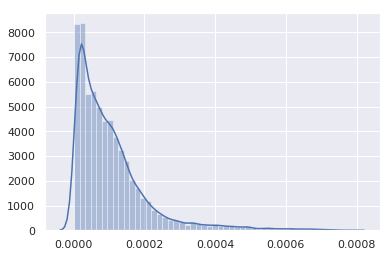

In [77]:
sns.distplot(posterior.apply(np.mean))

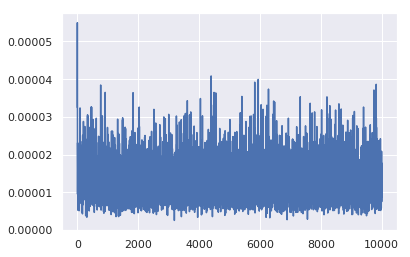

In [85]:
sns.lineplot(data=posterior[2000])

In [45]:
def basic_bt_prob(_lambda1, _lambda2):
    return _lambda1/(_lambda1+_lambda2)

In [87]:
num_correct = 0
num_errors = 0
log_loss = []


for index in range(len(test_match_data)):
    try:
        prob = basic_bt_prob(posterior[natural_indexed_dict[test_match_data['Blue'].values[index]]['index']], posterior[natural_indexed_dict[test_match_data['Red'].values[index]]['index']])
        choice = None
        if np.mean(prob) >= 0.5:
            choice = 'Blue'
        else:
            choice = 'Red'

        if choice == test_match_data['WinnerId'].values[index]:
            num_correct += 1
            if choice == 'Blue':
                log_loss.append(np.log(prob))
            else:
                log_loss.append(np.log(1-prob))
        else:
            if choice == 'Blue':
                log_loss.append(np.log(1-prob))
            else:
                log_loss.append(np.log(prob))
    except Exception as e:
        print(str(e))
        num_errors += 1

'Micky ls'
'Mettaton neo'
'A_flowey'
'Akuzi'
'Pocket sol badguy'
'Agrias BC'
'Kemono friends'
'Mettaton neo'
'Cailloustrawberry the soul ninja'
'Patrick'
'Sayuri hexe'
'Eins'
'Protoman EX2'
'Burai_yamamoto'
'Akito(coh)'
'Pocket sol badguy'
'Agrias BC'
'Cheaper'
'Shizuo-ax'
'Burai_yamamoto'
'Mettaton neo'
'Lanky kong'
'Pocket sol badguy'
'Protoman EX2'
'Sigma x2'
'Patrick'
'Zeke'
'Cammy snk'
'Cailloustrawberry the soul ninja'
'Zeke'
'Labrys'
'Mariabell armitage EX3'
'Cheaper'
'Mariabell armitage EX3'
'Sf1 charlie'
'Burai_yamamoto'
'Toyohime'
'Master maionese'
'Calliel lezai'
'Patrick'
'Patrick'
'Cheaper'
'A_flowey'
'Akuzi'
'Master maionese'
'Micky ls'
'C-lelouch'
'Akuzi'
'Zelda-cdi'
'Calliel lezai'
'Micky ls'
'Catwalk'
'Toyohime'
'Lanky kong'
'Mr.megane'
'Akuzi'
'Catwalk'
'Pocket sol badguy'
'Patrick'
'Patrick'
'A_flowey'
'Decade as kuuga'
'Akito(coh)'
'Zelda-cdi'
'Labrys'
'Nouka EX3'
'Burai_yamamoto'
'C-lelouch'
'Muhammad ali'
'Eins'
'Labrys'
'Catwalk'
'Amagon'
'Akito(coh)'
'Toyohime'


In [88]:
num_correct/(len(test_match_data) - num_errors), num_errors

(0.7157695680771761, 83)

In [89]:
np.mean(np.array(log_loss))

-0.5697156071005852

In [90]:
np.sum(np.array(log_loss))

-374180095.29395074

In [57]:
def advantage_bt_prob(_lambda1, _lambda2, theta, advantage):
    if advantage == 1:
        return _lambda1*theta/(_lambda1*theta + _lambda2)
    else:
        return _lambda1/(_lambda1 + _lambda2*theta)

In [91]:
theta = pd.read_csv('/home/jordan/Downloads/theta2.csv', header=None)
posterior = pd.read_csv('/home/jordan/Downloads/height_advantage2.csv', header=None)
theta = theta[1000:]
posterior = posterior[1000:]
theta = np.array(theta).reshape((9000,))

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Theta')]

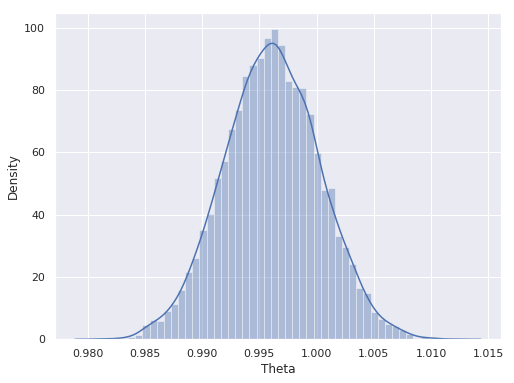

In [127]:
ax = sns.distplot(theta, norm_hist=True)
sns.set({'figure.figsize' : (6, 8)})
ax.set(xlabel='Theta', ylabel='Density')

In [111]:
imp
rcParams.keys()

NameError: name 'rcParams' is not defined

In [93]:
num_correct = 0
num_errors = 0
log_loss = []

for index in range(len(test_match_data)):
    try:
        if test_match_data['BlueHeight'].values[index] > test_match_data['RedHeight'].values[index]:
            prob = advantage_bt_prob(posterior[natural_indexed_dict[test_match_data['Blue'].values[index]]['level_0']], posterior[natural_indexed_dict[test_match_data['Red'].values[index]]['level_0']], theta, 1)
        else:
            prob = advantage_bt_prob(posterior[natural_indexed_dict[test_match_data['Blue'].values[index]]['level_0']], posterior[natural_indexed_dict[test_match_data['Red'].values[index]]['level_0']], theta, 2)
        choice = None
        if np.mean(prob) >= 0.5:
            choice = 'Blue'
        else:
            choice = 'Red'

        if choice == test_match_data['WinnerId'].values[index]:
            num_correct += 1
            if choice == 'Blue':
                log_loss.append(np.log(prob))
            else:
                log_loss.append(np.log(1-prob))
        else:
            if choice == 'Blue':
                log_loss.append(np.log(1-prob))
            else:
                log_loss.append(np.log(prob))
            
    except Exception as e:
        print(str(e))
        num_errors += 1

'Micky ls'
'Mettaton neo'
'A_flowey'
'Akuzi'
'Pocket sol badguy'
'Agrias BC'
'Kemono friends'
'Mettaton neo'
'Cailloustrawberry the soul ninja'
'Patrick'
'Sayuri hexe'
'Eins'
'Protoman EX2'
'Burai_yamamoto'
'Akito(coh)'
'Pocket sol badguy'
'Agrias BC'
'Cheaper'
'Shizuo-ax'
'Burai_yamamoto'
'Mettaton neo'
'Lanky kong'
'Pocket sol badguy'
'Protoman EX2'
'Sigma x2'
'Patrick'
'Zeke'
'Cammy snk'
'Cailloustrawberry the soul ninja'
'Zeke'
'Labrys'
'Mariabell armitage EX3'
'Cheaper'
'Mariabell armitage EX3'
'Sf1 charlie'
'Burai_yamamoto'
'Toyohime'
'Master maionese'
'Calliel lezai'
'Patrick'
'Patrick'
'Cheaper'
'A_flowey'
'Akuzi'
'Master maionese'
'Micky ls'
'C-lelouch'
'Akuzi'
'Zelda-cdi'
'Calliel lezai'
'Micky ls'
'Catwalk'
'Toyohime'
'Lanky kong'
'Mr.megane'
'Akuzi'
'Catwalk'
'Pocket sol badguy'
'Patrick'
'Patrick'
'A_flowey'
'Decade as kuuga'
'Akito(coh)'
'Zelda-cdi'
'Labrys'
'Nouka EX3'
'Burai_yamamoto'
'C-lelouch'
'Muhammad ali'
'Eins'
'Labrys'
'Catwalk'
'Amagon'
'Akito(coh)'
'Toyohime'


In [94]:
num_correct/(len(test_match_data) - num_errors)

0.49710863845647885

In [95]:
np.mean(np.array(log_loss))

-1.5602782826338413

In [96]:
np.sum(np.array(log_loss))

-1024765811.5813848

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


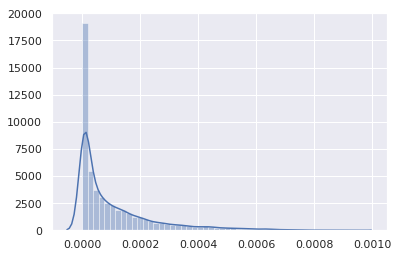

In [75]:
sns.distplot(posterior.apply(np.mean))

In [101]:
advantage_adjacency_dict = {}
for row_index in range(len(height_advantage_win_matrix)):
    advantage_adjacency_dict[row_index] = []
    if row_index % 1000 == 0:
        print(row_index)
    for col_index in range(len(height_advantage_win_matrix)):
        if height_advantage_win_matrix[row_index, col_index] > 0:
            advantage_adjacency_dict[row_index].append(col_index)
            
from tarjan import tarjan
tarjan(advantage_adjacency_dict)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


[[1892],
 [4576],
 [44],
 [72],
 [161],
 [3230],
 [1330],
 [2281],
 [2053],
 [181],
 [223],
 [266],
 [4208],
 [1342],
 [344],
 [355],
 [366],
 [1159],
 [1475],
 [1058],
 [1105],
 [269],
 [3915],
 [528],
 [948],
 [91],
 [263],
 [486],
 [7136],
 [1245],
 [916],
 [1797],
 [5911],
 [6417],
 [3274],
 [1104],
 [4309],
 [106],
 [1333],
 [1133],
 [2014],
 [1332],
 [690],
 [1302],
 [692],
 [3861],
 [5159],
 [5765],
 [1312],
 [2454],
 [3286],
 [954],
 [1226],
 [1787],
 [118],
 [472],
 [1617],
 [534],
 [3283],
 [1423],
 [4749],
 [1995],
 [1067],
 [2758],
 [2554],
 [1474],
 [6002],
 [347],
 [1191],
 [3208],
 [4182],
 [3479],
 [7145],
 [687],
 [1094],
 [3732],
 [8652],
 [3899],
 [6045],
 [7898],
 [4334],
 [6688],
 [6670],
 [7818],
 [7059],
 [4494],
 [2648],
 [2804],
 [5811],
 [6429],
 [6741],
 [5666],
 [4482],
 [5992],
 [8300],
 [7474],
 [4534],
 [4568],
 [5788],
 [8326],
 [3294],
 [9070],
 [7088],
 [4288],
 [6850],
 [4616],
 [3273],
 [3276],
 [4898],
 [7547],
 [4344],
 [3753],
 [4760],
 [9020],
 [

In [103]:
len(tarjan(advantage_adjacency_dict))

9453

In [104]:
disadvantage_adjacency_dict = {}
for row_index in range(len(height_advantage_loss_matrix)):
    disadvantage_adjacency_dict[row_index] = []
    if row_index % 1000 == 0:
        print(row_index)
    for col_index in range(len(height_advantage_loss_matrix)):
        if height_advantage_loss_matrix[row_index, col_index] > 0:
            disadvantage_adjacency_dict[row_index].append(col_index)
            
from tarjan import tarjan
len(tarjan(disadvantage_adjacency_dict))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


9133